In [ ]:

from google.colab import drive
drive.mount('/content/drive')

import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import vgg16

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


num_epochs = 10
batch_size = 128
learning_rate = 0.0001
checkpoint_interval = 1

# Define checkpoint
checkpoint_dir = '/content/drive/My Drive/Colab Notebooks/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, 'latest_checkpoint.pth')


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

model = vgg16(pretrained=True)

# Freeze the first few layers
for param in model.features[:10].parameters():
    param.requires_grad = False

# Modify the classifier for 10 classes
model.classifier[6] = nn.Linear(4096, 10)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Function to save checkpoint
def save_checkpoint(epoch, model, optimizer, checkpoint_path):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'learning_rate': learning_rate,
    }
    torch.save(checkpoint, checkpoint_path)
    print(f"Checkpoint saved at '{checkpoint_path}'")

# Function to load checkpoint
def load_checkpoint(model, optimizer, checkpoint_path):
    if os.path.isfile(checkpoint_path):
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        print(f"Checkpoint loaded from '{checkpoint_path}' (Epoch {epoch})")
        return epoch
    else:
        print(f"No checkpoint found at '{checkpoint_path}'")
        return 0


start_epoch = 0


if os.path.exists(checkpoint_path):
    start_epoch = load_checkpoint(model, optimizer, checkpoint_path)

# Training loop
for epoch in range(start_epoch, num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # Save checkpoint at specified intervals
    if (epoch + 1) % checkpoint_interval == 0:
        save_checkpoint(epoch + 1, model, optimizer, checkpoint_path)

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Final Test Accuracy: {100 * correct / total:.2f}%')


Mounted at /content/drive


100%|██████████| 170M/170M [00:13<00:00, 12.6MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 86.2MB/s]


Epoch 1/10
Epoch [1/10], Loss: 0.4420
Checkpoint saved at '/content/drive/My Drive/Colab Notebooks/checkpoints/latest_checkpoint.pth'
Epoch 2/10
Epoch [2/10], Loss: 0.1815
Checkpoint saved at '/content/drive/My Drive/Colab Notebooks/checkpoints/latest_checkpoint.pth'
Epoch 3/10
Epoch [3/10], Loss: 0.0918
Checkpoint saved at '/content/drive/My Drive/Colab Notebooks/checkpoints/latest_checkpoint.pth'
Epoch 4/10
Epoch [4/10], Loss: 0.0651
Checkpoint saved at '/content/drive/My Drive/Colab Notebooks/checkpoints/latest_checkpoint.pth'
Epoch 5/10
Epoch [5/10], Loss: 0.0481
Checkpoint saved at '/content/drive/My Drive/Colab Notebooks/checkpoints/latest_checkpoint.pth'
Epoch 6/10
Epoch [6/10], Loss: 0.0400
Checkpoint saved at '/content/drive/My Drive/Colab Notebooks/checkpoints/latest_checkpoint.pth'
Epoch 7/10
Epoch [7/10], Loss: 0.0386
Checkpoint saved at '/content/drive/My Drive/Colab Notebooks/checkpoints/latest_checkpoint.pth'
Epoch 8/10
Epoch [8/10], Loss: 0.0355
Checkpoint saved at '/co

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import vgg16


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_epochs = 20
batch_size = 128
learning_rate = 0.0001
checkpoint_interval = 1

# Checkpoint directory
checkpoint_dir = '/content/drive/My Drive/Colab Notebooks/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, 'latest_checkpoint.pth')

# Data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Load pre-trained VGG16 model
model = vgg16(pretrained=True)
for param in model.features[:10].parameters():
    param.requires_grad = False

model.classifier[6] = nn.Linear(4096, 10)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Load checkpoint function
def load_checkpoint(model, optimizer, checkpoint_path):
    if os.path.isfile(checkpoint_path):
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        print(f"Checkpoint loaded from '{checkpoint_path}' (Epoch {epoch})")
        return epoch
    else:
        print(f"No checkpoint found at '{checkpoint_path}'")
        return 0

# Save checkpoint function
def save_checkpoint(epoch, model, optimizer, checkpoint_path):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'learning_rate': learning_rate,
    }
    torch.save(checkpoint, checkpoint_path)
    print(f"Checkpoint saved at '{checkpoint_path}'")

# Load existing checkpoint
start_epoch = load_checkpoint(model, optimizer, checkpoint_path)

# Training loop
for epoch in range(start_epoch, num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # Save checkpoint periodically
    if (epoch + 1) % checkpoint_interval == 0:
        save_checkpoint(epoch + 1, model, optimizer, checkpoint_path)

# Evaluation
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Final Test Accuracy: {100 * correct / total:.2f}%')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Checkpoint loaded from '/content/drive/My Drive/Colab Notebooks/checkpoints/latest_checkpoint.pth' (Epoch 10)
Epoch 11/20
Epoch [11/20], Loss: 0.0240
Checkpoint saved at '/content/drive/My Drive/Colab Notebooks/checkpoints/latest_checkpoint.pth'
Epoch 12/20
Epoch [12/20], Loss: 0.0296
Checkpoint saved at '/content/drive/My Drive/Colab Notebooks/checkpoints/latest_checkpoint.pth'
Epoch 13/20
Epoch [13/20], Loss: 0.0271
Checkpoint saved at '/content/drive/My Drive/Colab Notebooks/checkpoints/latest_checkpoint.pth'
Epoch 14/20
Epoch [14/20], Loss: 0.0221
Checkpoint saved at '/content/drive/My Drive/Colab Notebooks/checkpoints/latest_checkpoint.pth'
Epoch 15/20
Epoch [15/20], Loss: 0.0211
Checkpoint saved at '/content/drive/My Drive/Colab Notebooks/checkpoints/latest_checkpoint.pth'
Epoch 16/20
Epoch [16/20], Loss: 0.0274
Checkpoint saved at '/content/drive/My Dr

Test Loss: 0.3464
Test Accuracy: 92.49%

Classification Report:
              precision    recall  f1-score   support

    airplane       0.89      0.96      0.92      1000
  automobile       0.98      0.95      0.97      1000
        bird       0.94      0.88      0.91      1000
         cat       0.85      0.85      0.85      1000
        deer       0.94      0.93      0.93      1000
         dog       0.87      0.89      0.88      1000
        frog       0.97      0.94      0.95      1000
       horse       0.96      0.94      0.95      1000
        ship       0.90      0.97      0.93      1000
       truck       0.97      0.94      0.95      1000

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.93     10000
weighted avg       0.93      0.92      0.93     10000



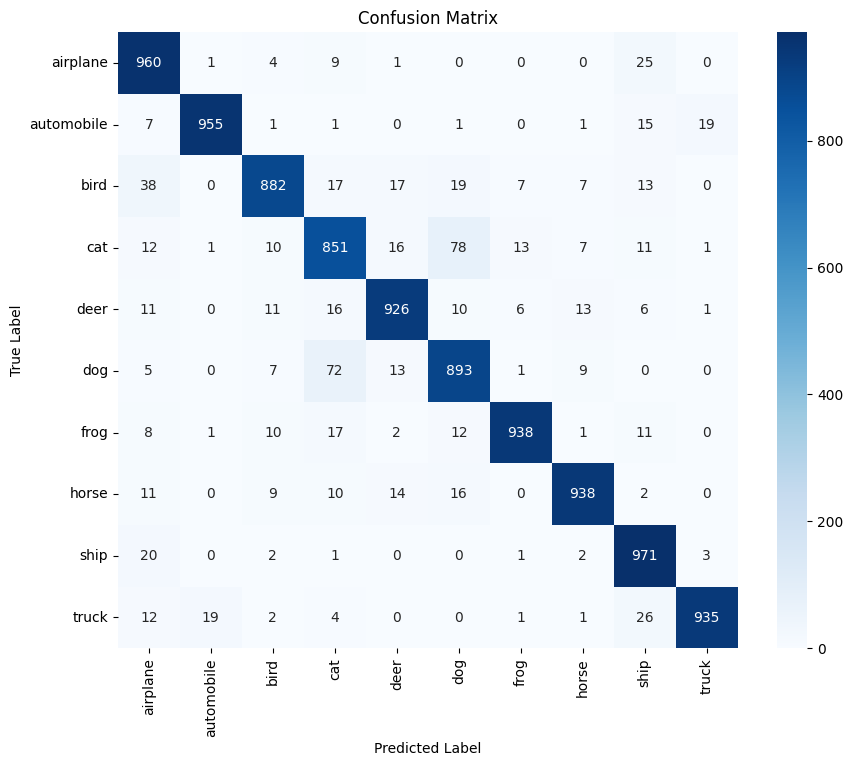

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

model.eval()
test_loss = 0.0
correct = 0
total = 0
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Calculate average test loss and accuracy
avg_test_loss = test_loss / len(test_loader)
test_accuracy = 100 * correct / total

print(f"Test Loss: {avg_test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2f}%\n")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
